obs if you are running this in vscode, you need to select python environment as prolif, and then select the prolif environment as your kernel too 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import prolif as plf
import MDAnalysis as mda
import pandas as pd
import analysis_functions

# Load unis using analysis scripts

In [15]:
all_unis, all_lens = analysis_functions.load_EM_unis()

# Run fp , save df, put in dict

If you don't change anything here you could turn this calculation to false to save time. Right now I have skip50 on to make the calculation smoother

In [71]:
all_fp_dfs = {}

for condition in all_unis.keys():
    # print(condition)
    temp_fp_dfs = []
    for n, replica in enumerate(all_unis[condition]):
        if (
            condition != "PfHT_apo"
        ):  ## no need to run fingerprints on sim that doesn't have mmv...
            df = analysis_functions.get_fp_dataframe(
                u=replica,
                skip=50,
                run_calc=True,
                filename=f"{condition}.replica_{n+1}.skip50",
            )
            temp_fp_dfs.append(df)
    all_fp_dfs[condition] = temp_fp_dfs
all_fp_dfs.pop("PfHT_apo")  ## probably a better way to remove this guy, but that's ok

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

[]

# Calculate percentage of pi stacking. 
Just find where TRP412 (or equivalent) is in the dataframe, then divide sum (since only True or False) by total sim length


save in numpy array called `all_pis` with shape (`[n_conditions], [n_replicas]`)

In [75]:
all_pis = np.zeros((4, 3))


for n_cond, condition in enumerate(all_fp_dfs.keys()):
    for n_rep, replica in enumerate(all_fp_dfs[condition]):
        if "GLUT1" not in condition and "W412A" not in condition:
            try:
                percent_pi = (replica["TRP391"]["PiStacking"].sum()) / len(replica)
            except KeyError:  # if there is never pi stacking, won't find it in the df
                percent_pi = 0

        elif "GLUT1" in condition:
            try:
                percent_pi = (replica["TRP381"]["PiStacking"].sum()) / len(replica)
            except KeyError:  # if there is never pi stacking, won't find it in the df
                percent_pi = 0

        elif "W412A" in condition:
            percent_pi = 0

        all_pis[n_cond, n_rep] = percent_pi

plot grouped barplot

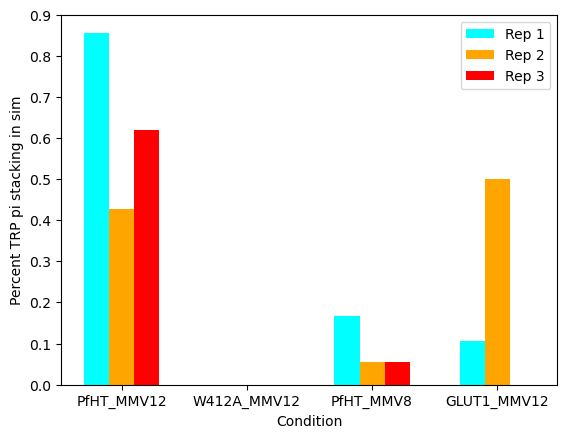

In [91]:
x = np.arange(np.shape(all_pis)[0])
width = 0.2
plt.bar(x - 0.2, all_pis[:, 0], width, color="cyan")
plt.bar(x, all_pis[:, 1], width, color="orange")
plt.bar(x + 0.2, all_pis[:, 2], width, color="red")

plt.xticks(x, all_fp_dfs.keys())
plt.xlabel("Condition")
plt.ylabel("Percent TRP pi stacking in sim")
plt.legend(["Rep 1", "Rep 2", "Rep 3"])

In [83]:
all_pis

array([[0.85714286, 0.42857143, 0.61904762],
       [0.        , 0.        , 0.        ],
       [0.16666667, 0.05555556, 0.05555556],
       [0.10526316, 0.5       , 0.        ]])